In [1]:
# Data Overview and Summary Statistics Notebook

# Import necessary libraries
import pandas as pd

# Load the datasets
balancing_data = pd.read_csv('/Users/sravansridhar/Desktop/Edp_datathon/data/balancing_data.csv')
demand_load_data = pd.read_csv('/Users/sravansridhar/Desktop/Edp_datathon/data/demand_load_data.csv')
generation_data = pd.read_csv('/Users/sravansridhar/Desktop/Edp_datathon/data/generation_data.csv')
price_data = pd.read_csv('/Users/sravansridhar/Desktop/Edp_datathon/data/price_data.csv')

# Display the first few rows of each dataset
print("Balancing Data:")
print(balancing_data.head())
print("\nDemand Load Data:")
print(demand_load_data.head())
print("\nGeneration Data:")
print(generation_data.head())
print("\nPrice Data:")
print(price_data.head())

# Summary statistics for each dataset
print("\nSummary Statistics for Balancing Data:")
print(balancing_data.describe())
print("\nSummary Statistics for Demand Load Data:")
print(demand_load_data.describe())
print("\nSummary Statistics for Generation Data:")
print(generation_data.describe())
print("\nSummary Statistics for Price Data:")
print(price_data.describe())

Balancing Data:
              GMT Time System Price (ESO Outturn) - GB (£/MWh)  \
0  2018-01-01T00:00:00                                   55.94   
1  2018-01-01T00:30:00                                   55.94   
2  2018-01-01T01:00:00                                   62.94   
3  2018-01-01T01:30:00                                      31   
4  2018-01-01T02:00:00                                   60.81   

   NIV Outturn (+ve long) - GB (MW) BM Bid Acceptances (total) - GB (MW)  \
0                            -77.05                             -1833.86   
1                           -334.76                             -1443.78   
2                           -219.78                             -1580.12   
3                            286.63                             -1699.05   
4                           -141.41                             -1413.27   

  BM Offer Acceptances (total) - GB (MW)  \
0                                1910.98   
1                                1778.09  

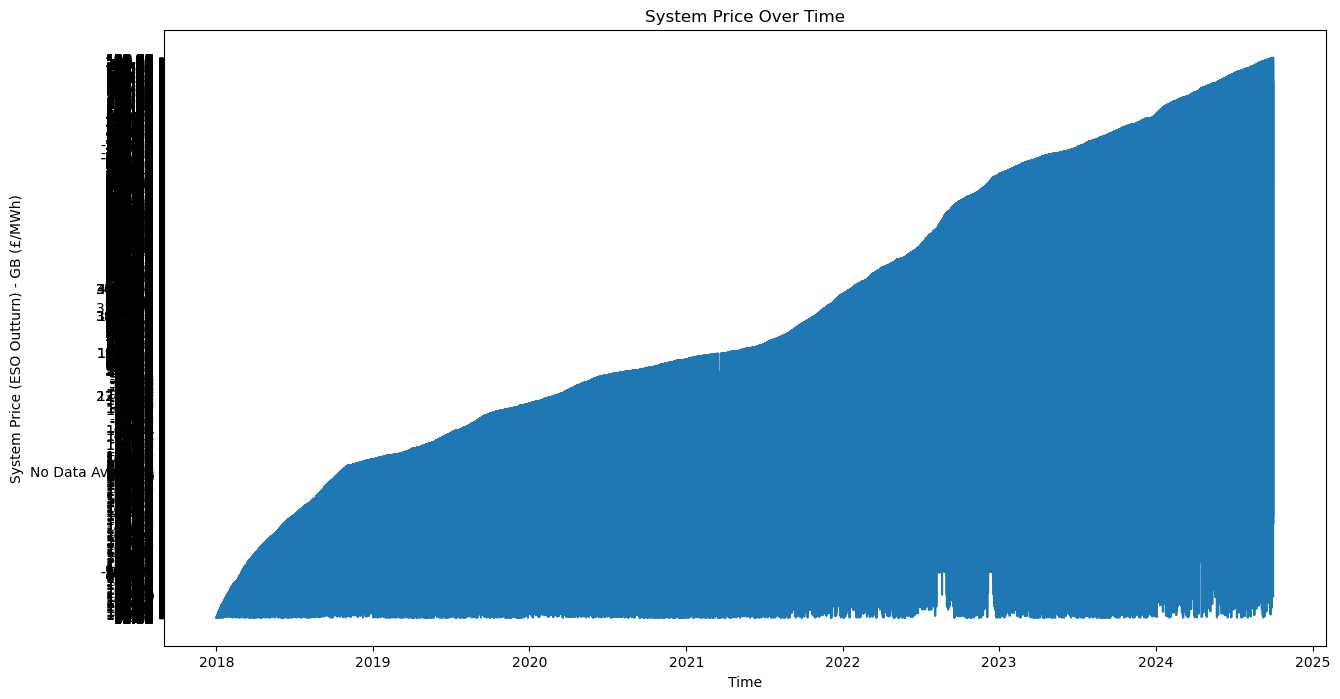

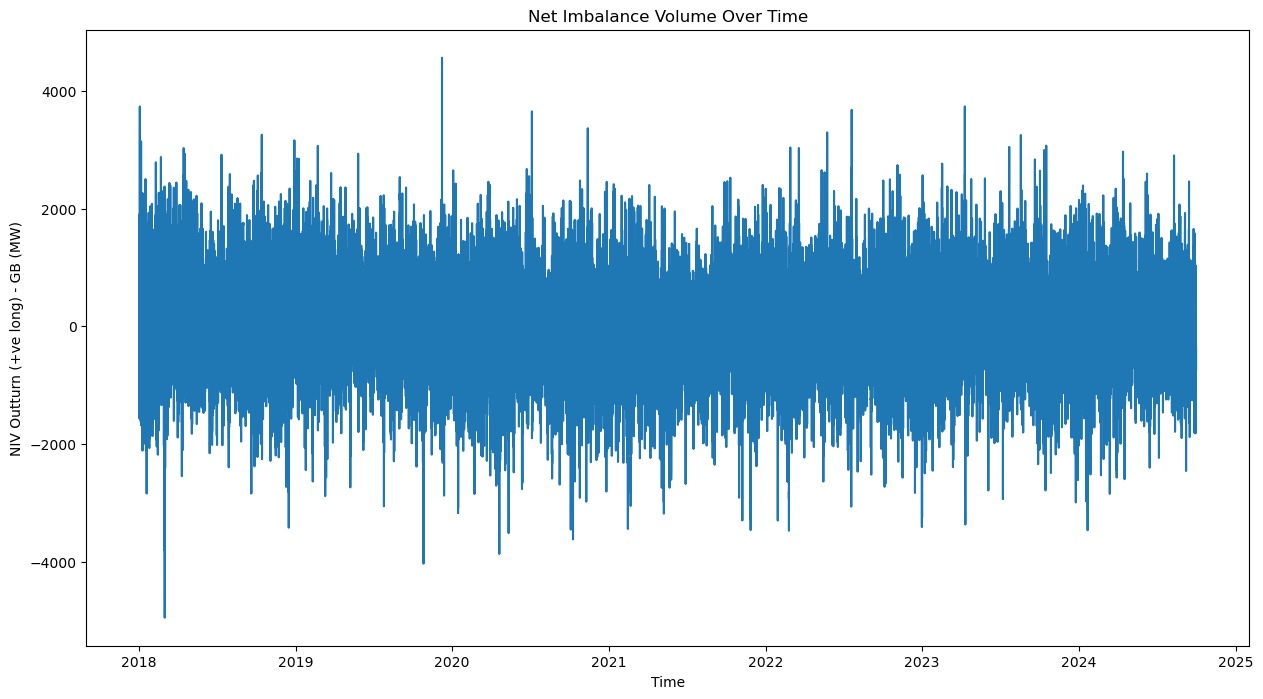

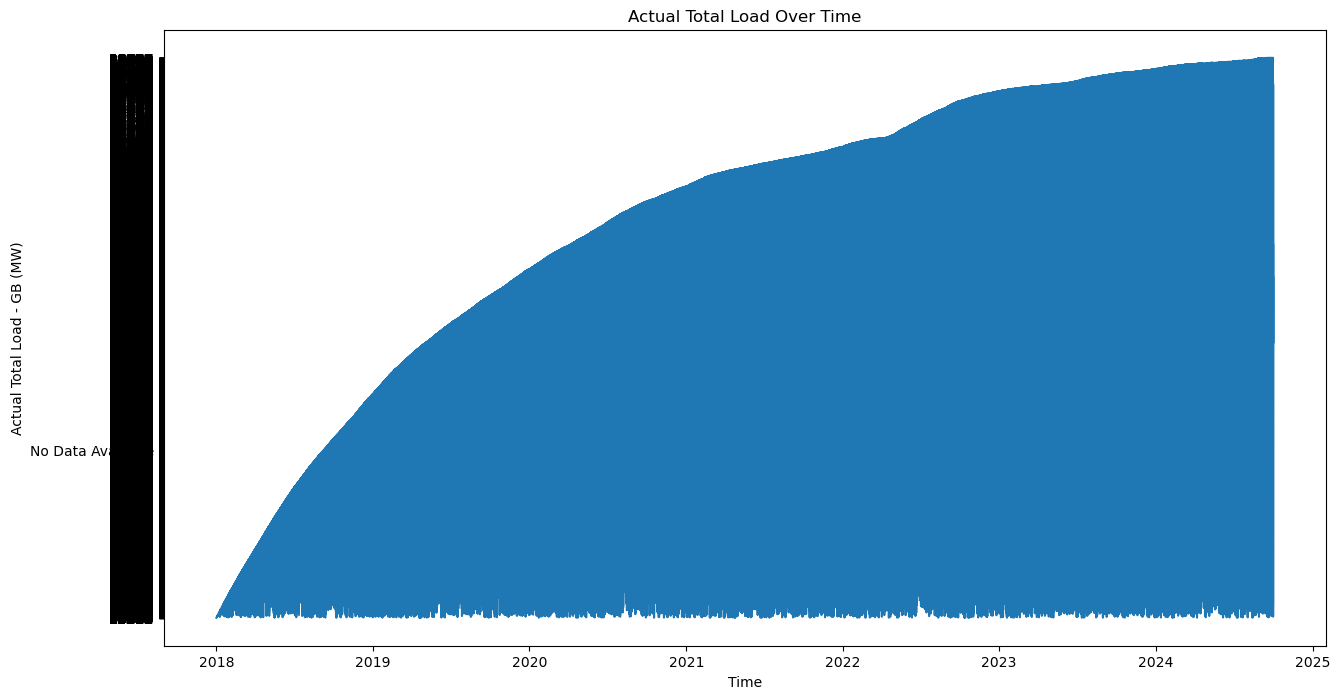

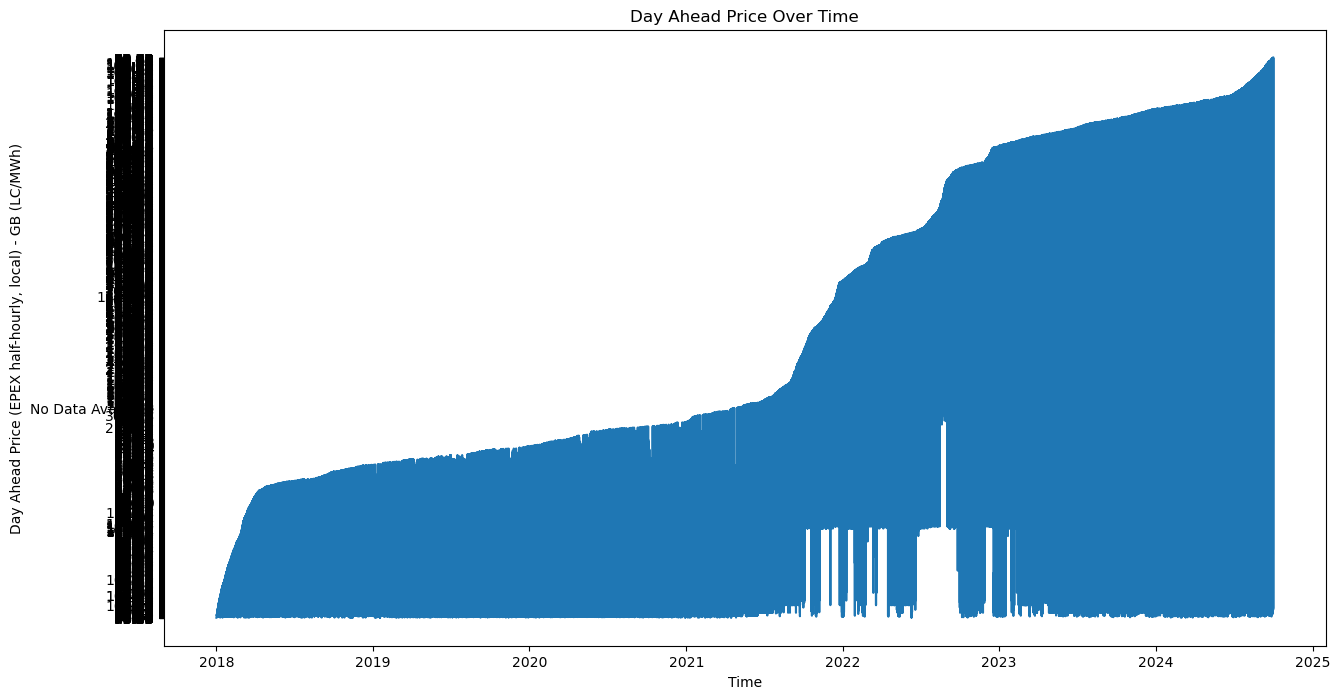

In [2]:
# Interactive Time Series Analysis Notebook

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
balancing_data = pd.read_csv('/Users/sravansridhar/Desktop/Edp_datathon/data/balancing_data.csv')
demand_load_data = pd.read_csv('/Users/sravansridhar/Desktop/Edp_datathon/data/demand_load_data.csv')
generation_data = pd.read_csv('/Users/sravansridhar/Desktop/Edp_datathon/data/generation_data.csv')
price_data = pd.read_csv('/Users/sravansridhar/Desktop/Edp_datathon/data/price_data.csv')

# Convert GMT Time to datetime
for df in [balancing_data, demand_load_data, generation_data, price_data]:
    df['GMT Time'] = pd.to_datetime(df['GMT Time'])

# Merge datasets on GMT Time
merged_data = pd.merge(balancing_data, demand_load_data, on='GMT Time')
merged_data = pd.merge(merged_data, generation_data, on='GMT Time')
merged_data = pd.merge(merged_data, price_data, on='GMT Time')

# Plotting function for time series data
def plot_time_series(data, column, title):
    plt.figure(figsize=(15, 8))
    plt.plot(data['GMT Time'], data[column])
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.show()

# Plot time series for different variables
plot_time_series(merged_data, 'System Price (ESO Outturn) - GB (£/MWh)', 'System Price Over Time')
plot_time_series(merged_data, 'NIV Outturn (+ve long) - GB (MW)', 'Net Imbalance Volume Over Time')
plot_time_series(merged_data, 'Actual Total Load - GB (MW)', 'Actual Total Load Over Time')
plot_time_series(merged_data, 'Day Ahead Price (EPEX half-hourly, local) - GB (LC/MWh)', 'Day Ahead Price Over Time')

/var/folders/4n/xlvp5dd530zgvp5yzcjmsv400000gn/T/ipykernel_74510/1599637572.py:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='ffill', inplace=True)
/var/folders/4n/xlvp5dd530zgvp5yzcjmsv400000gn/T/ipykernel_74510/1599637572.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data.fillna(method='bfill', inplace=True)


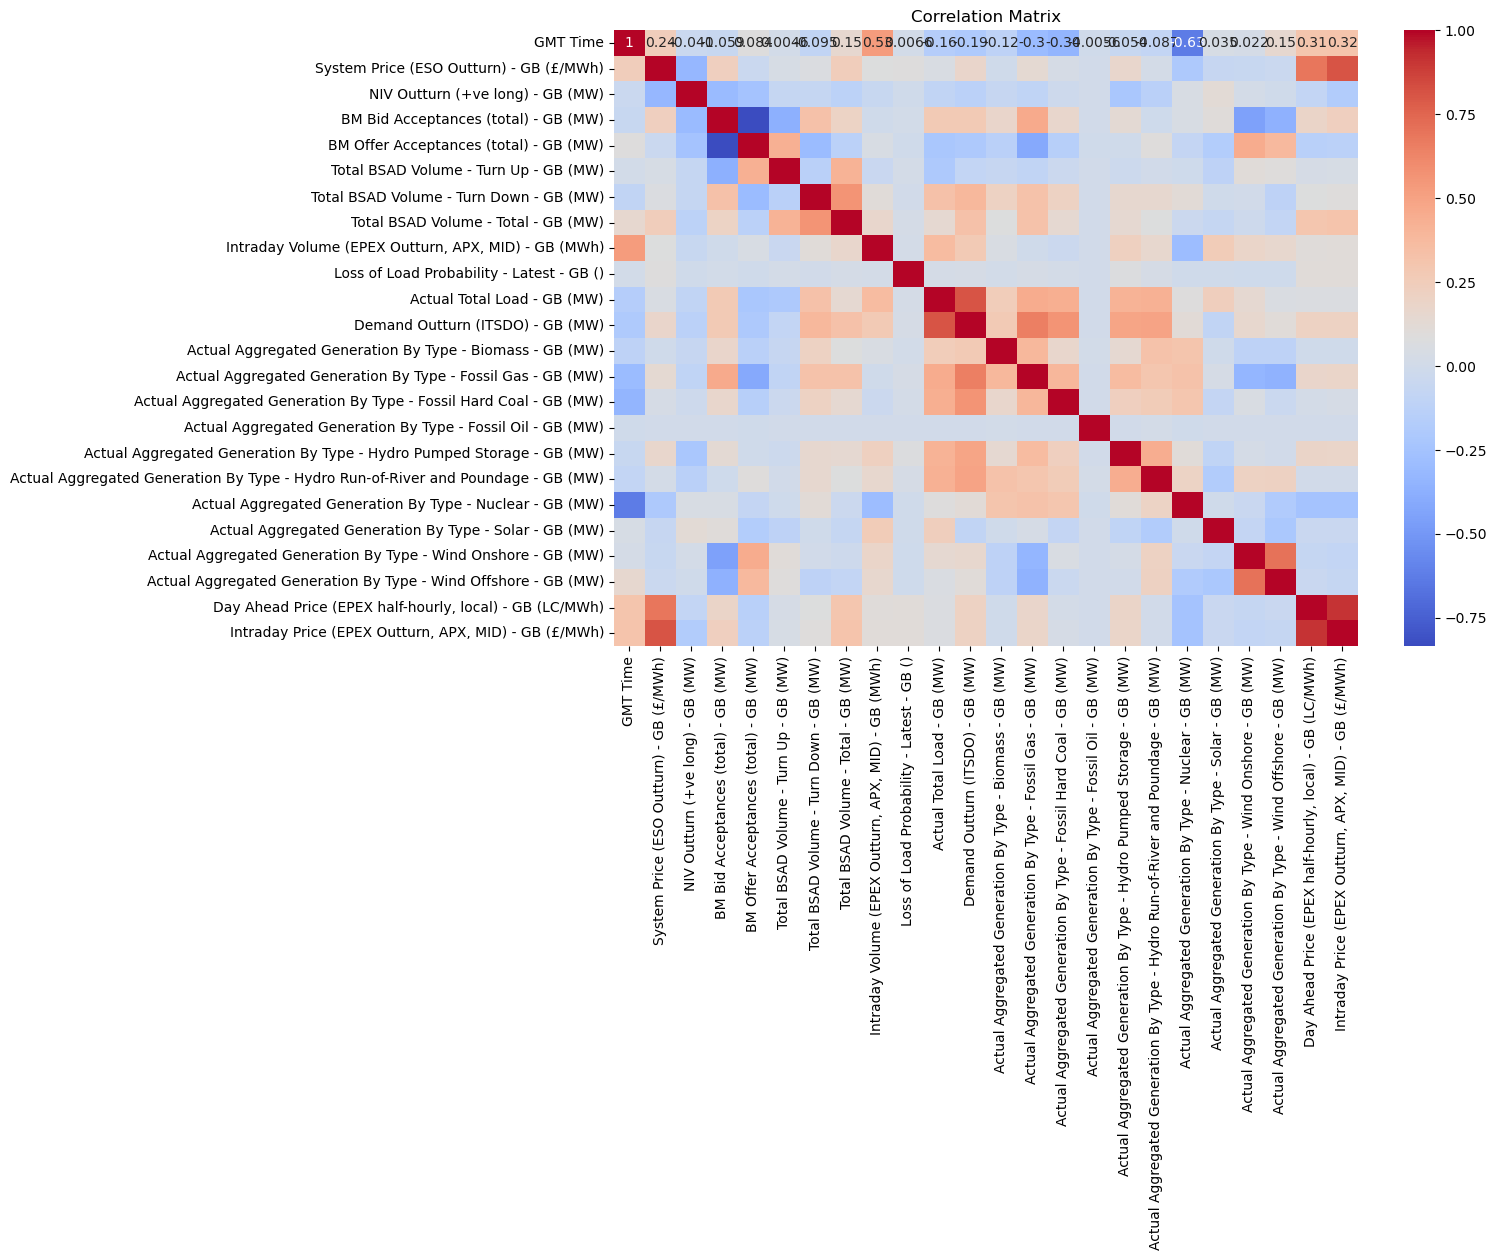

Feature Importances for System Price Prediction:
                                                    Importance
Intraday Price (EPEX Outturn, APX, MID) - GB (£...    0.697233
BM Bid Acceptances (total) - GB (MW)                  0.063132
BM Offer Acceptances (total) - GB (MW)                0.061995
Day Ahead Price (EPEX half-hourly, local) - GB ...    0.038554
Actual Aggregated Generation By Type - Fossil G...    0.014341
Actual Aggregated Generation By Type - Biomass ...    0.013241
Intraday Volume (EPEX Outturn, APX, MID) - GB (...    0.012523
Total BSAD Volume - Turn Up - GB (MW)                 0.010087
Total BSAD Volume - Total - GB (MW)                   0.009062
Actual Aggregated Generation By Type - Wind Ons...    0.008474
Actual Aggregated Generation By Type - Nuclear ...    0.008294
Actual Aggregated Generation By Type - Hydro Pu...    0.008099
Total BSAD Volume - Turn Down - GB (MW)               0.007841
Actual Aggregated Generation By Type - Wind Off...    0.007743
Actual

In [4]:
# Correlation and Feature Importance Analysis Notebook

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Load the datasets
balancing_data = pd.read_csv('/Users/sravansridhar/Desktop/Edp_datathon/data/balancing_data.csv')
demand_load_data = pd.read_csv('/Users/sravansridhar/Desktop/Edp_datathon/data/demand_load_data.csv')
generation_data = pd.read_csv('/Users/sravansridhar/Desktop/Edp_datathon/data/generation_data.csv')
price_data = pd.read_csv('/Users/sravansridhar/Desktop/Edp_datathon/data/price_data.csv')

# Convert GMT Time to datetime
for df in [balancing_data, demand_load_data, generation_data, price_data]:
    df['GMT Time'] = pd.to_datetime(df['GMT Time'])

# Replace 'No Data Available' with NaN
for df in [balancing_data, demand_load_data, generation_data, price_data]:
    df.replace('No Data Available', np.nan, inplace=True)

# Merge datasets on GMT Time
merged_data = pd.merge(balancing_data, demand_load_data, on='GMT Time')
merged_data = pd.merge(merged_data, generation_data, on='GMT Time')
merged_data = pd.merge(merged_data, price_data, on='GMT Time')

# Convert all columns to numeric
for col in merged_data.columns:
    if merged_data[col].dtype == 'object':
        merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

# Handle missing values
merged_data.fillna(method='ffill', inplace=True)
merged_data.fillna(method='bfill', inplace=True)

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = merged_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature importance using RandomForestRegressor
X = merged_data.drop(columns=['GMT Time', 'System Price (ESO Outturn) - GB (£/MWh)', 'NIV Outturn (+ve long) - GB (MW)'])
y_price = merged_data['System Price (ESO Outturn) - GB (£/MWh)']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y_price)

feature_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print("Feature Importances for System Price Prediction:")
print(feature_importances)